# Statistical Analysis

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

In [2]:
from _databrick import stat_df, fix_df

print(f'Total entries: {len(stat_df):,}')
print(f'Unique commits: {len(stat_df.Child.unique()):,}')
print(f'Entries for refix paths: {len(fix_df):,}')
print(f'Unique commits in refix paths: {len(fix_df.Child.unique()):,}')

Total entries: 63,923
Unique commits: 24,486
Entries for refix paths: 4,593
Unique commits in refix paths: 1,110


In [3]:
stat_df.iloc[0]

Parent      9d35cf00d8e3a28f8bacb48a9a16aeceb974325d
Child       796f45d14550420d66e1ed28daefeb45874d195f
Bug Type                 Same Function Change Caller
Depth                                              1
Refix                                          False
Name: 0, dtype: object

## General Exploration

In [4]:
stat_df.groupby('Depth').agg('size')

Depth
1     61042
2      2408
3       315
4        86
5        22
6        20
7        15
8         3
9         5
10        2
11        3
12        2
dtype: int64

<AxesSubplot:>

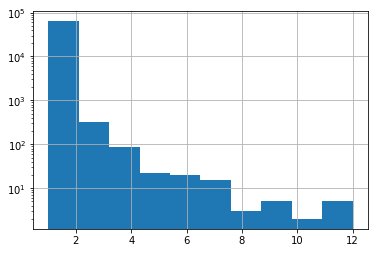

In [5]:
stat_df['Depth'].hist(log=True)

<AxesSubplot:>

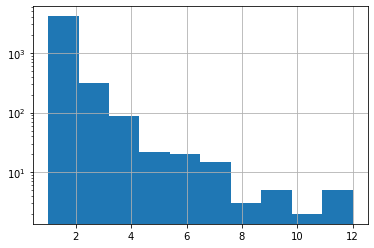

In [6]:
fix_df.Depth.hist(log=True)

In [7]:
stat_df.describe(percentiles=[.90, .99, .999])

,Depth
count,63923.000
mean,1.058
std,0.326
min,1.000
50%,1.000
90%,1.000
99%,2.000
99.9%,5.000
max,12.000


> The min value for `distance` is `1`.
> This is because `distance` is `0` for the commits without parents.
> There is no dedicated row for such commits in `sstubs_large`.

In [8]:
fix_df.describe(percentiles=[.25, .50, .825, .90, .99, .999])

,Depth
count,4593.000
mean,1.807
std,0.935
min,1.000
25%,1.000
50%,2.000
82.5%,2.000
90%,3.000
99%,6.000
99.9%,10.408


<AxesSubplot:>

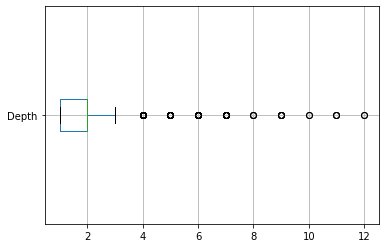

In [9]:
fix_df[['Depth']].boxplot(vert=False)

In [10]:
print(f'SStuBs Skewness: {stat_df.Depth.skew()}')
print(f'Fix Skewness: {fix_df.Depth.skew()}')

SStuBs Skewness: 10.805853473940637
Fix Skewness: 3.456311022022263


In [11]:
print(f'SStuBs Kurtosis: {stat_df.Depth.kurt()}')
print(f'Fix Kurtosis: {fix_df.Depth.kurt()}')

SStuBs Kurtosis: 199.9706992380031
Fix Kurtosis: 23.386476567966078


## Bug Type Wise Exploration


### Description

In [12]:
fix_df.groupby(by='Bug Type').Depth\
    .describe(percentiles=[.75, .85, .95])\
    .sort_values('count', ascending=False)

,count,mean,std,min,50%,75%,85%,95%,max
Bug Type,,,,,,,,,
Change Identifier Used,1535.0,1.889,0.859,1.0,2.0,2.0,2.0,3.0,8.0
Wrong Function Name,1103.0,1.987,0.886,1.0,2.0,2.0,2.0,4.0,8.0
Change Numeric Literal,457.0,1.939,0.820,1.0,2.0,3.0,3.0,3.0,4.0
Change Modifier,408.0,1.748,1.732,1.0,1.0,2.0,2.0,4.0,12.0
Same Function More Args,331.0,1.290,0.480,1.0,1.0,2.0,2.0,2.0,3.0
Same Function Less Args,186.0,1.629,0.517,1.0,2.0,2.0,2.0,2.0,3.0
Change Binary Operator,156.0,1.545,0.525,1.0,2.0,2.0,2.0,2.0,3.0
Change Boolean Literal,100.0,1.510,0.522,1.0,1.5,2.0,2.0,2.0,3.0
More Specific If,84.0,1.476,0.526,1.0,1.0,2.0,2.0,2.0,3.0


In [13]:
VIP_TYPES = [
    'Change Identifier Used',
    'Wrong Function Name',
    'Change Numeric Literal',
    'Change Modifier',
]

### Boxplot

<AxesSubplot:title={'center':'Depth'}, xlabel='Bug Type'>

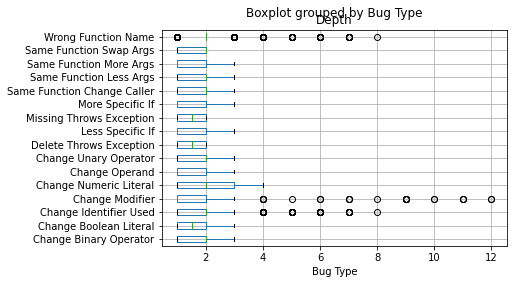

In [14]:
fix_df.boxplot(by='Bug Type', column=['Depth'], vert=False)

<AxesSubplot:title={'center':'Depth'}, xlabel='Bug Type'>

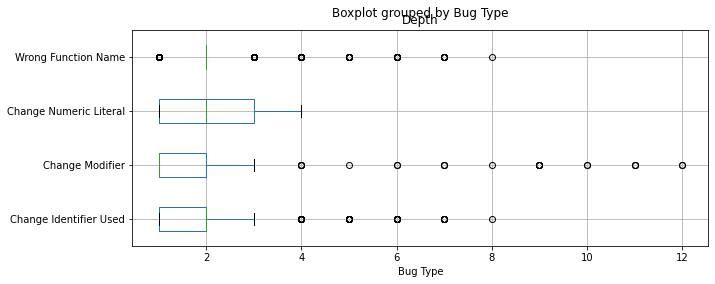

In [15]:
fix_df[fix_df['Bug Type'].isin(VIP_TYPES)]\
    .boxplot(by='Bug Type', column='Depth', vert=False, figsize=(10, 4))

### Histogram

In [16]:
def plot_hist(sharey = True, legend=False, dense=True):
    color = '#0092A6'
    font_size = 14
    axes = fix_df[fix_df['Bug Type'].isin(VIP_TYPES)].hist(
        column='Depth',
        by='Bug Type',
        log=True,
        bins=[i+1 for i in range(11)],
        sharey=sharey,
        layout=(-1, 4),
        figsize=(16 if dense else 20, 3),
        color=color,
        xlabelsize=font_size,
        ylabelsize=font_size,
        legend=legend,
    )

    for ax in axes:
        ax.set_xlabel('Depth')
        ax.xaxis.label.set_color(color)
        ax.xaxis.label.set_fontsize(font_size)
        ax.set_ylabel('Occurrence')
        ax.yaxis.label.set_color(color)
        ax.yaxis.label.set_fontsize(font_size)
        ax.title.set_color(color)
        ax.title.set_fontsize(font_size)
        ax.tick_params(axis='x', colors=color)
        ax.tick_params(axis='y', colors=color)

    return axes

#### Same Height
> In the following plots, all histograms will have the same height.
> This will help to compare how refixes are distributed among all bug-types.

array([<AxesSubplot:title={'center':'Change Identifier Used'}, xlabel='Depth', ylabel='Occurrence'>,
       <AxesSubplot:title={'center':'Change Modifier'}, xlabel='Depth', ylabel='Occurrence'>,
       <AxesSubplot:title={'center':'Change Numeric Literal'}, xlabel='Depth', ylabel='Occurrence'>,
       <AxesSubplot:title={'center':'Wrong Function Name'}, xlabel='Depth', ylabel='Occurrence'>],
      dtype=object)

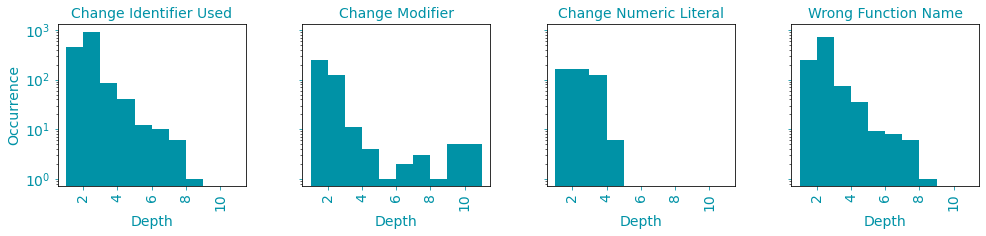

In [17]:
plot_hist(sharey=True)

#### Variable Height
> In the following plots, all histograms will have a height based on the
> amount of data inside the group.
> This will help to analyze how different refix lengths are distributed
> inside a single bug-type

array([<AxesSubplot:title={'center':'Change Identifier Used'}, xlabel='Depth', ylabel='Occurrence'>,
       <AxesSubplot:title={'center':'Change Modifier'}, xlabel='Depth', ylabel='Occurrence'>,
       <AxesSubplot:title={'center':'Change Numeric Literal'}, xlabel='Depth', ylabel='Occurrence'>,
       <AxesSubplot:title={'center':'Wrong Function Name'}, xlabel='Depth', ylabel='Occurrence'>],
      dtype=object)

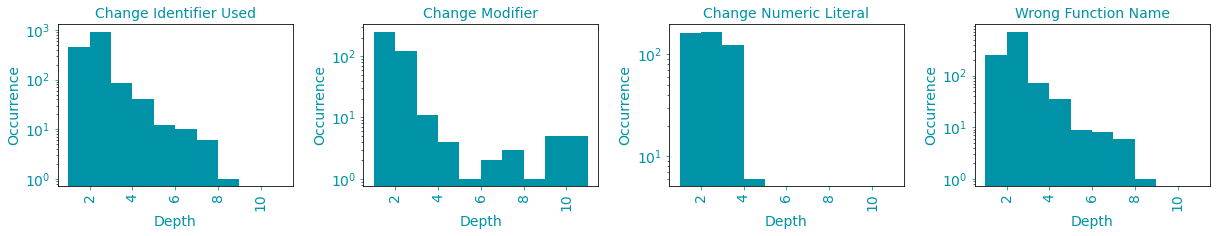

In [18]:
plot_hist(sharey=False, dense=False)

### Bar Chart of Count

<AxesSubplot:>

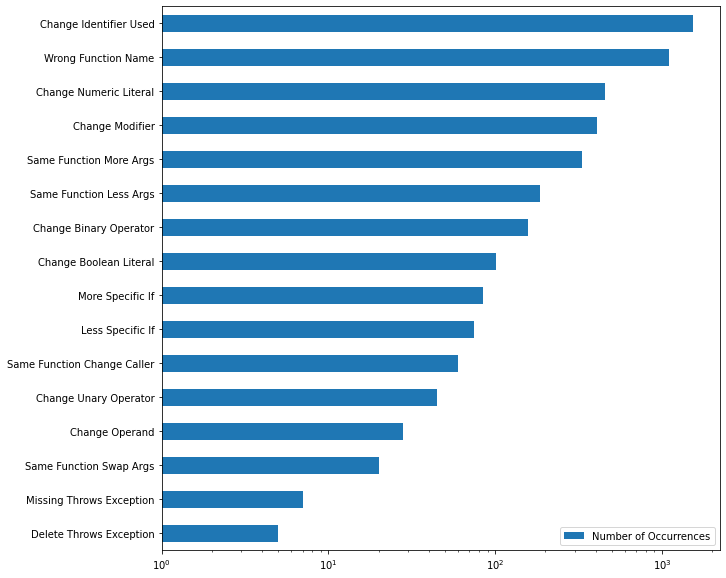

In [19]:
fix_df['Bug Type'].value_counts().sort_values()\
    .rename('Number of Occurrences').plot.barh(
    log=True,
    legend=True,
    figsize=(10, 10)
)

### Central Tendency

In [20]:
central_tendency_df = fix_df.groupby('Bug Type').Depth\
    .agg(['mean', stats.hmean, stats.gmean])\
    .sort_values('mean', ascending=False)
central_tendency_df

,mean,hmean,gmean
Bug Type,,,
Wrong Function Name,1.987,1.698,1.834
Change Numeric Literal,1.939,1.589,1.759
Change Identifier Used,1.889,1.602,1.736
Change Modifier,1.748,1.275,1.420
Same Function Swap Args,1.684,1.520,1.607
Same Function Less Args,1.629,1.447,1.539
Same Function Change Caller,1.627,1.388,1.500
Change Unary Operator,1.568,1.382,1.473
Change Binary Operator,1.545,1.366,1.454


<AxesSubplot:ylabel='Bug Type'>

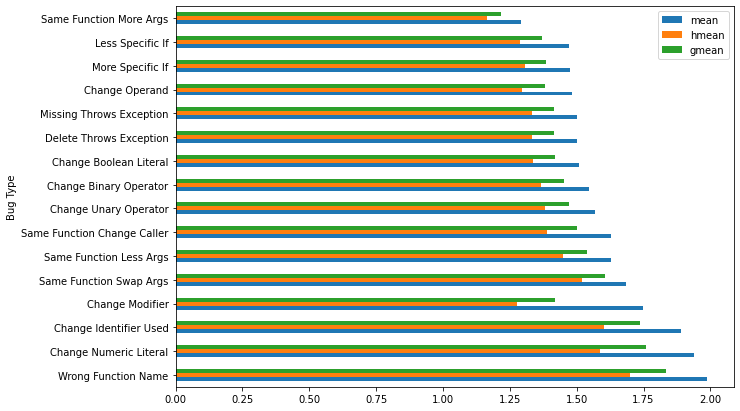

In [21]:
central_tendency_df.plot.barh(figsize=(10, 7))

### Variance

In [22]:
variance_df = fix_df.groupby('Bug Type').Depth\
    .agg(['var', 'std', 'min', 'max'])\
    .sort_values('var', ascending=False)
variance_df

,var,std,min,max
Bug Type,,,,
Change Modifier,3.000,1.732,1,12
Wrong Function Name,0.786,0.886,1,8
Change Identifier Used,0.737,0.859,1,8
Change Numeric Literal,0.672,0.820,1,4
Same Function Change Caller,0.445,0.667,1,3
Change Operand,0.336,0.580,1,3
Less Specific If,0.335,0.579,1,3
Delete Throws Exception,0.333,0.577,1,2
Missing Throws Exception,0.300,0.548,1,2


<AxesSubplot:ylabel='Bug Type'>

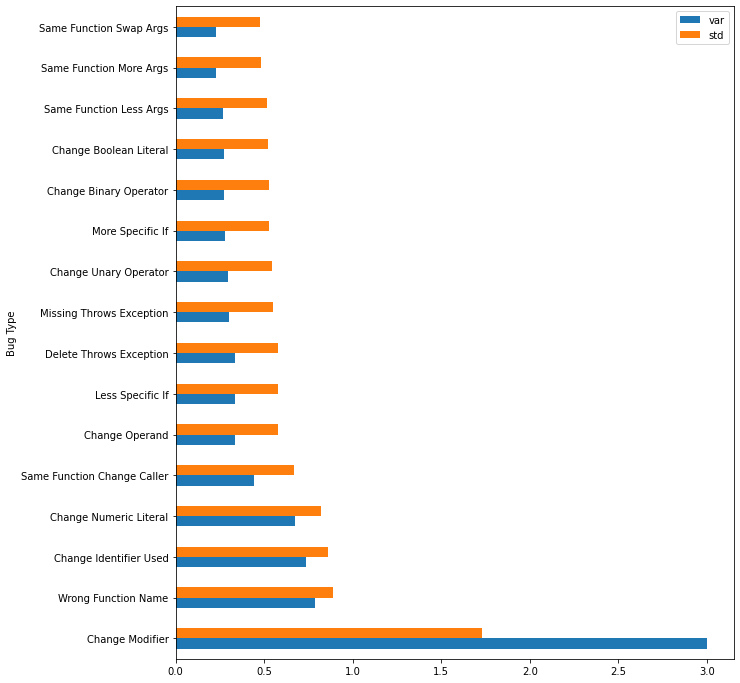

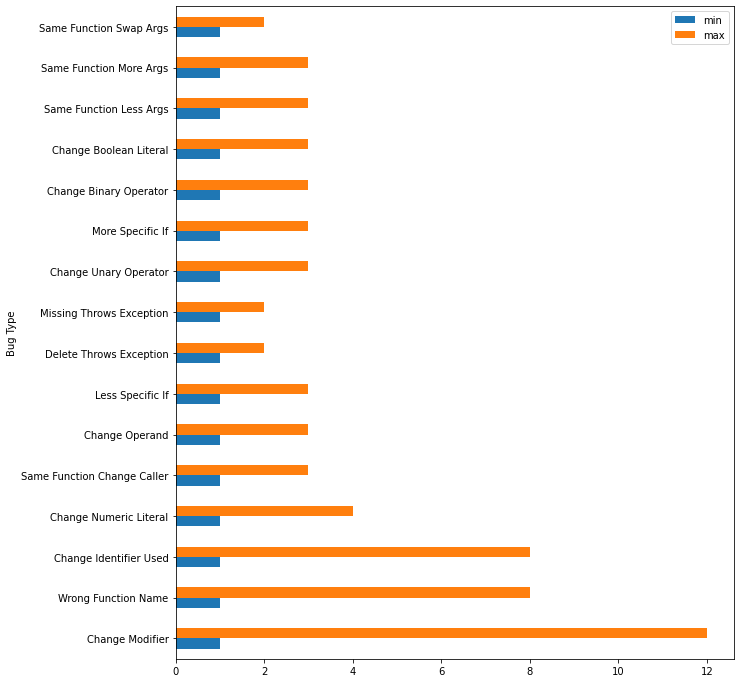

In [23]:
variance_df[['var', 'std']].plot.barh(figsize=(10, 12))
variance_df[['min', 'max']].plot.barh(figsize=(10, 12))

### Symmetry

In [24]:
symmetry_df = fix_df.groupby('type').depth\
    .agg(['count', 'skew', pd.Series.kurt])\
    .sort_values('skew', ascending=False)
symmetry_df

KeyError: 'type'